In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd
import pandas as pd

# other possible packages: pysptk, surfboard, torchaudio
import antropy as ant # for entropy computation
from scipy.stats import entropy

import warnings
warnings.filterwarnings("ignore")

In [2]:
data_path = "../data"
audio1_path = os.path.join(data_path, "wav/03a01Fa.wav")
audio2_path = os.path.join(data_path, "wav/03a01Nc.wav")
audio3_path = os.path.join(data_path, "wav/03a07Wc.wav")

In [107]:
# load audio data
audio1, sample_rate1 = librosa.load(audio1_path)
audio2, sample_rate2 = librosa.load(audio2_path)
audio3, sample_rate3 = librosa.load(audio3_path)

In [4]:
sample_rate3 # -> always the same? read in paper or check here! 
# actually in the paper they say they downsampled to 16kHz but here we have 22.05 kHz; could be due to CD recordings are
# often measured in 44.1 kHz and divisions 22.05 kHz or 11.025 kHz

22050

# Audio loading

In [5]:
ipd.Audio(audio1_path) 

In [6]:
ipd.Audio(audio2_path) 

In [7]:
ipd.Audio(audio3_path) 

# Waveform plotting

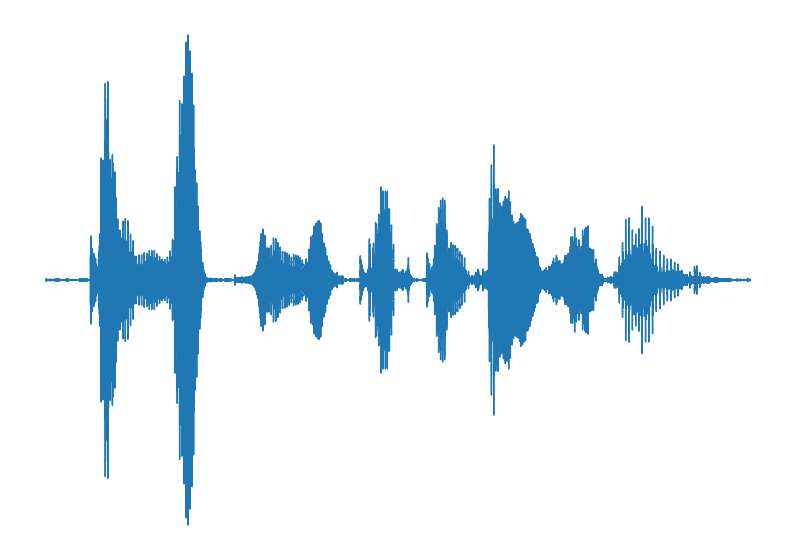

In [8]:
plt.figure(figsize=(10,7))
plt.axis('off')
librosa.display.waveshow(audio1, sr=sample_rate1)
plt.show()

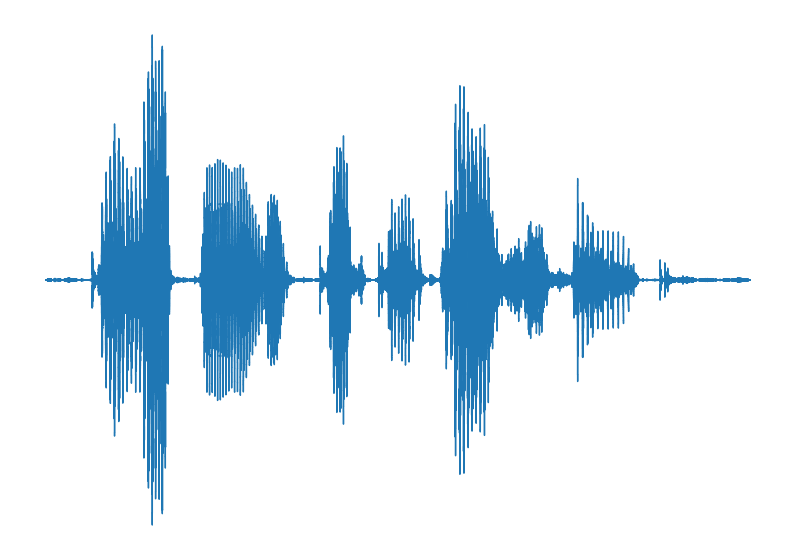

In [9]:
plt.figure(figsize=(10,7))
plt.axis('off')
librosa.display.waveshow(audio2, sr=sample_rate2)
plt.show()

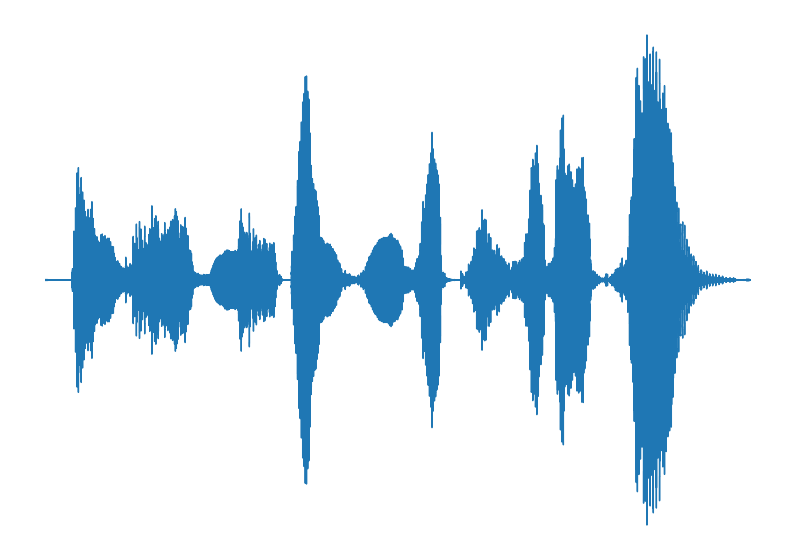

In [10]:
plt.figure(figsize=(10,7))
plt.axis('off')
librosa.display.waveshow(audio3, sr=sample_rate3)
plt.show()

# Harmonic percursive, mono, stereo

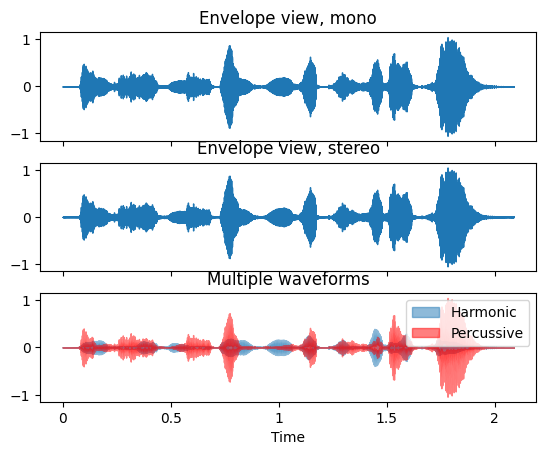

In [11]:
y, sr = librosa.load(audio3_path)
fig, ax = plt.subplots(nrows=3, sharex=True)
librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set(title='Envelope view, mono')
ax[0].label_outer()

y_harm, y_perc = librosa.effects.hpss(y)
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax[2], label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[2], label='Percussive')
ax[2].set(title='Multiple waveforms')
ax[2].legend()

y, sr = librosa.load(audio3_path, mono=False)
librosa.display.waveshow(y, sr=sr, ax=ax[1])
ax[1].set(title='Envelope view, stereo')       # according to Darshit not correct; would need to show two different plots
ax[1].label_outer()

# Spectrogram

In [12]:
def plot_spectrogram(signal, name):
    """Compute power spectrogram with Short-Time Fourier Transform and plot result."""
    spectrogram = librosa.amplitude_to_db(librosa.stft(signal))
    plt.figure(figsize=(20, 15))
    librosa.display.specshow(spectrogram, y_axis="log")
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Log-frequency power spectrogram for {name}")
    plt.xlabel("Time")
    plt.show()

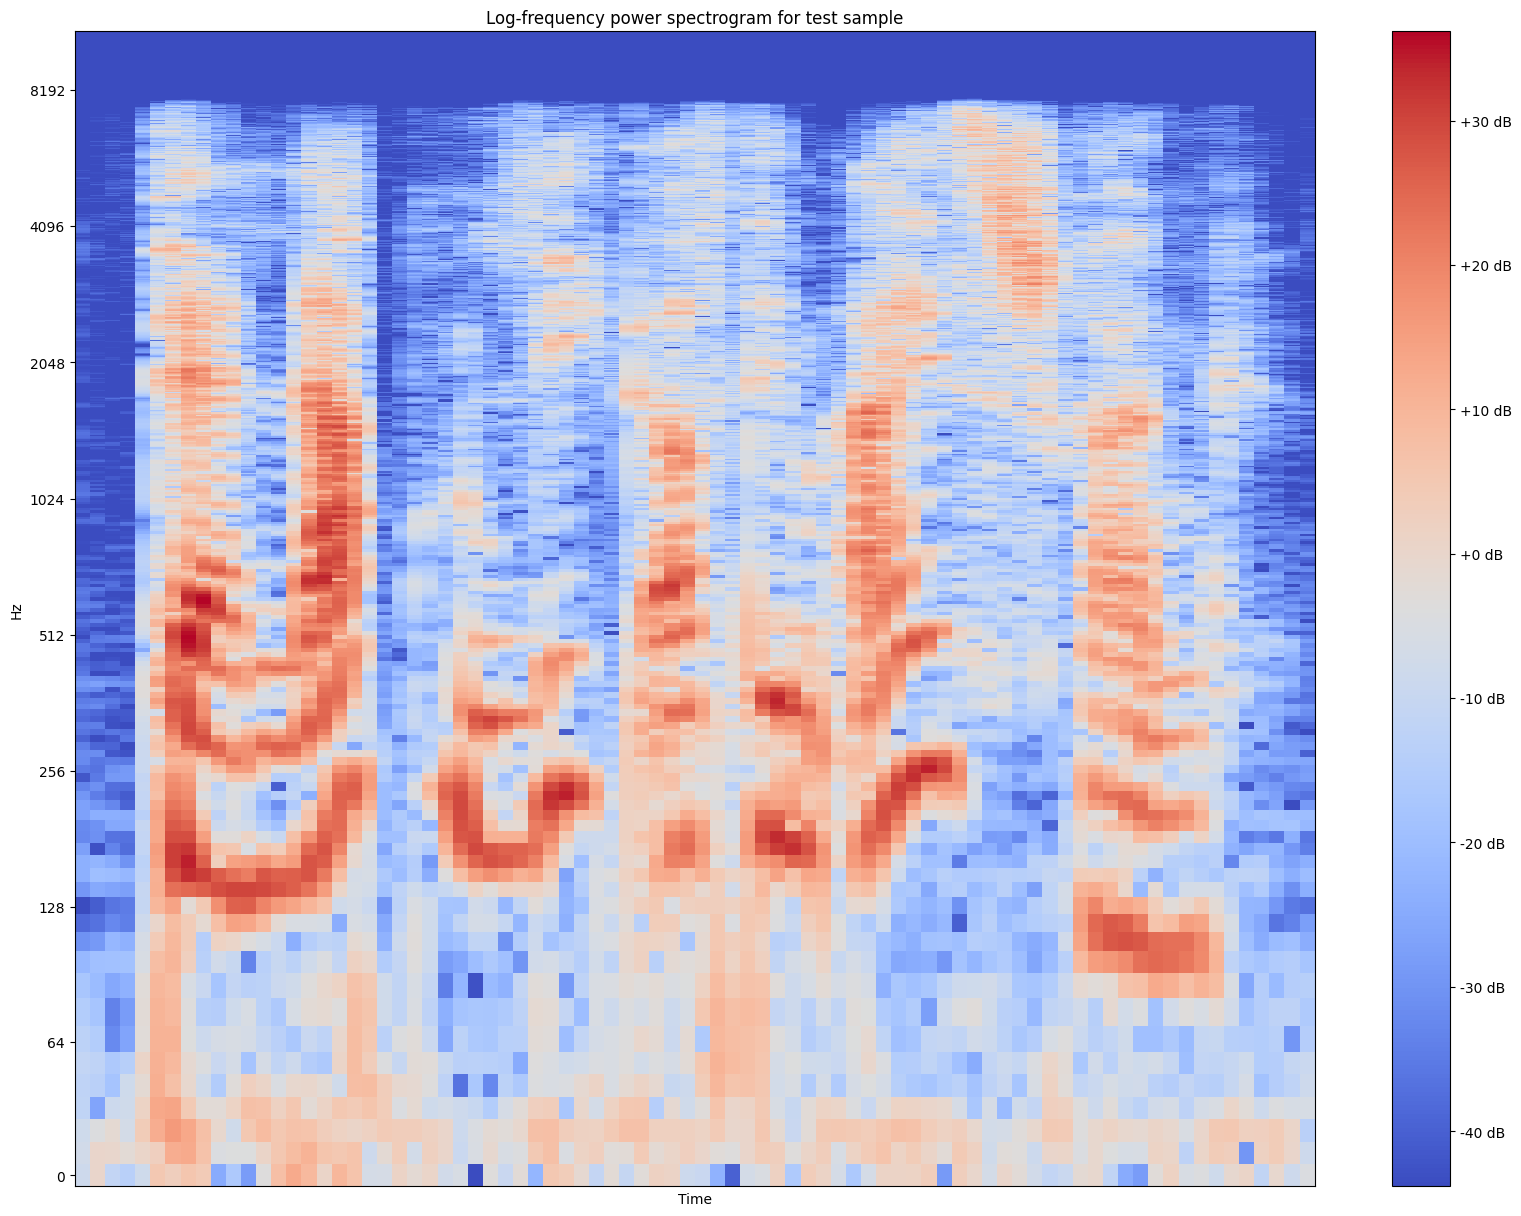

In [13]:
plot_spectrogram(audio1, "test sample")

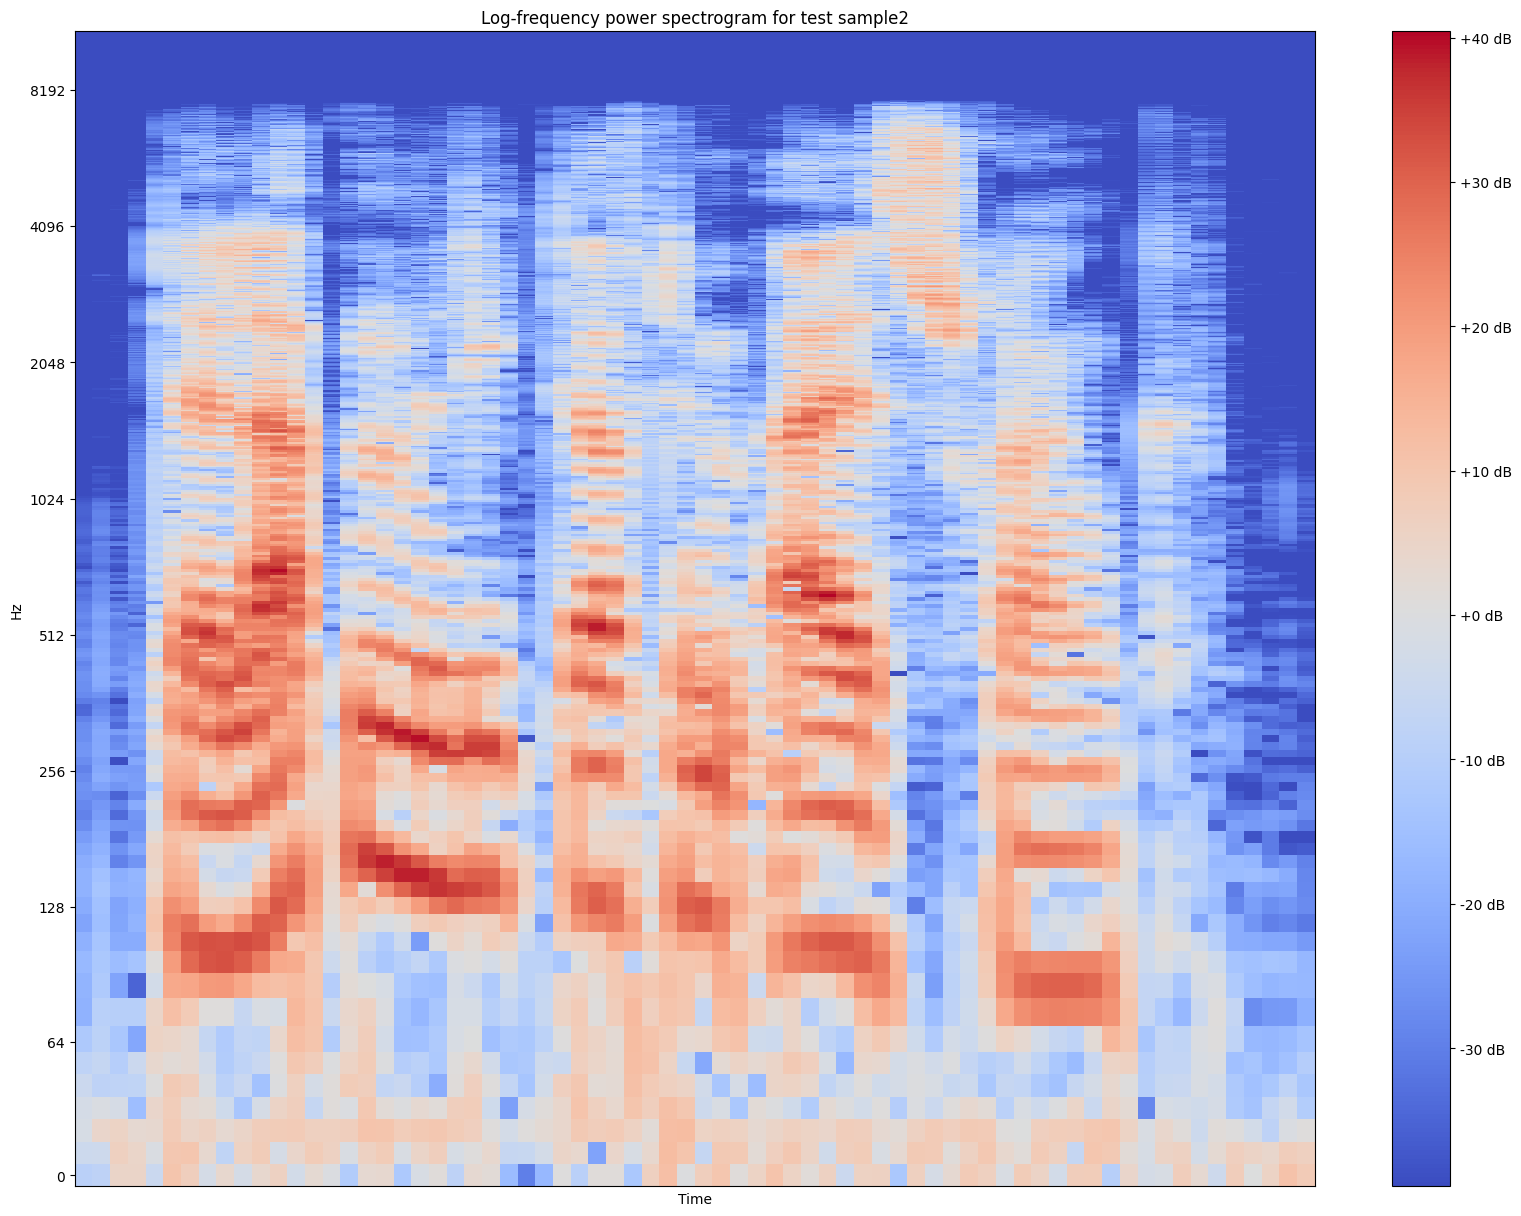

In [14]:
plot_spectrogram(audio2, "test sample2")

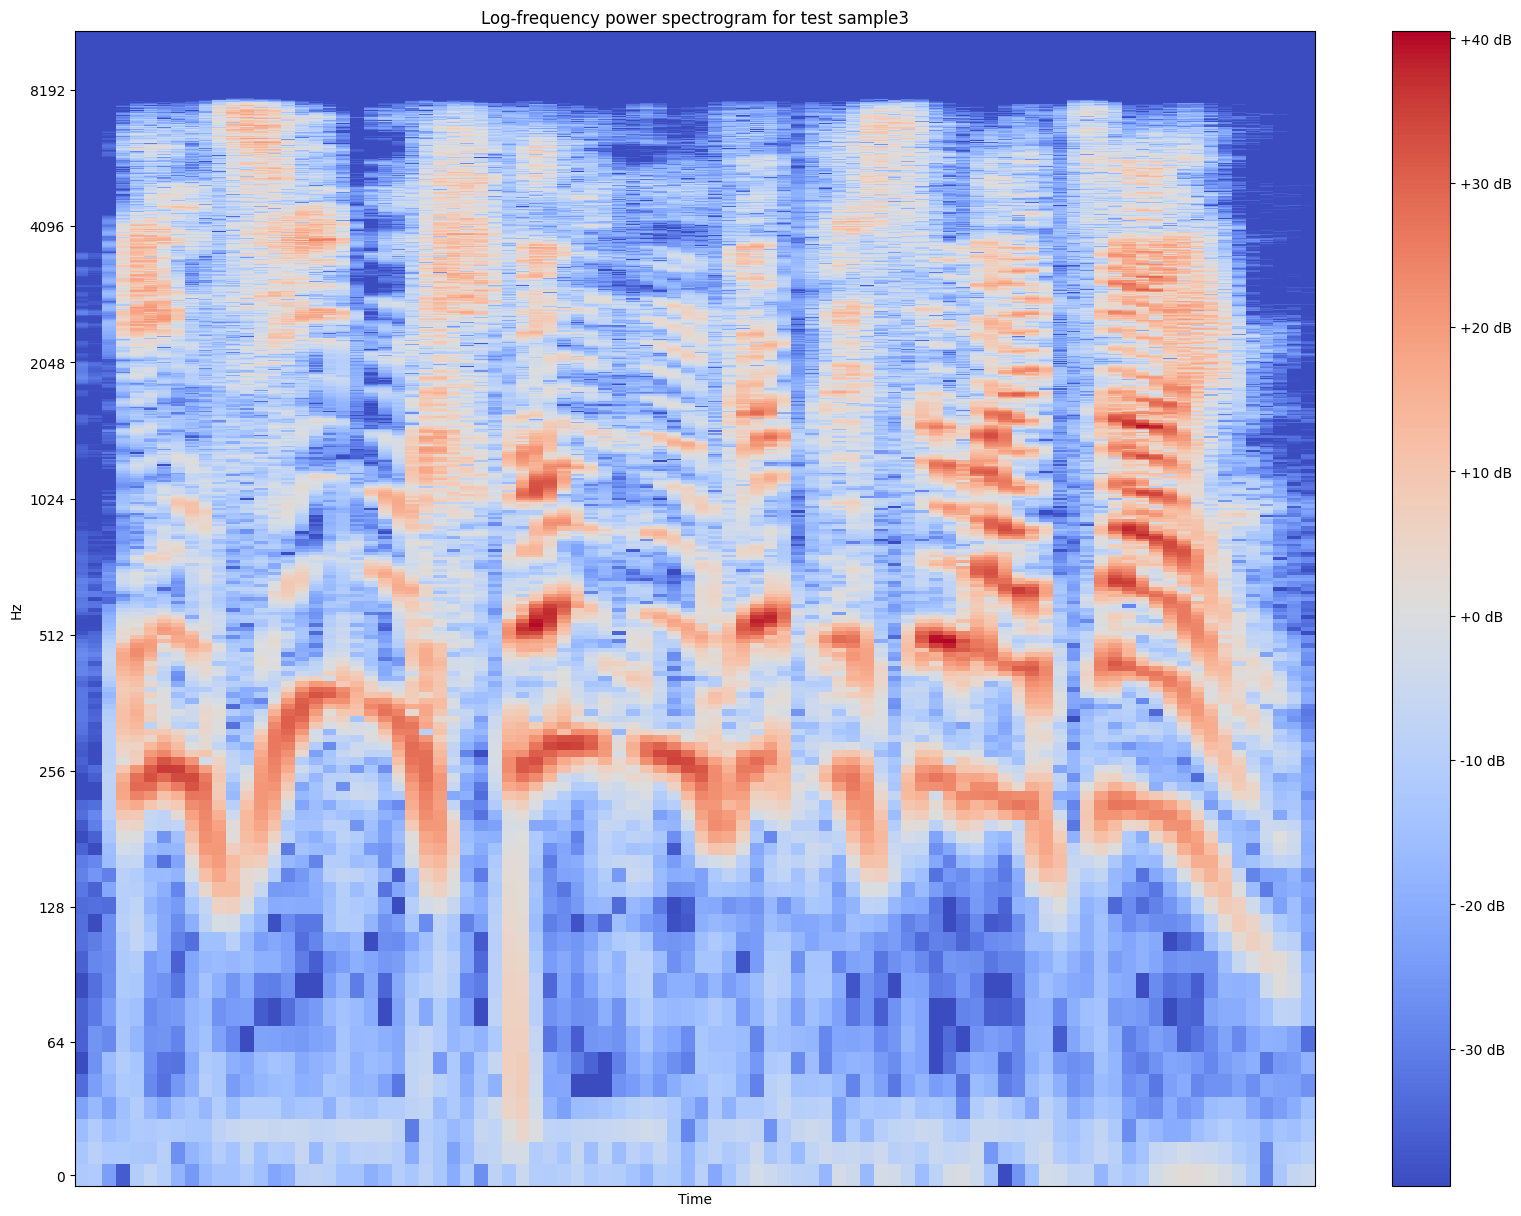

In [15]:
plot_spectrogram(audio3, "test sample3")

In [16]:
librosa.feature.chroma_stft(y=audio1, sr=sample_rate1)

array([[0.93444663, 0.6100306 , 0.62872726, 0.58853376, 0.43836588,
        0.37302265, 0.72770137, 0.60876995, 0.18757756, 0.15453304,
        0.6669064 , 0.74053204, 0.3025914 , 0.24613263, 0.45422995,
        0.11650255, 0.15989363, 0.22838767, 0.23589009, 0.18326393,
        0.8672082 , 0.49799344, 0.19454847, 0.05979111, 0.08232401,
        0.093442  , 0.02137363, 0.00388827, 0.0048637 , 0.0089107 ,
        0.04617546, 0.02890844, 0.02592124, 0.02632438, 0.08082341,
        0.3675803 , 0.25725594, 0.31738424, 0.04879644, 0.10254431,
        0.34305575, 0.49271736, 0.7994773 , 0.91180575, 0.5311978 ,
        0.01821144, 0.00442616, 0.011134  , 0.08924174, 0.5755624 ,
        0.27700353, 0.15172508, 0.26391825, 0.21569368, 0.12272322,
        0.41282913, 1.        , 1.        , 0.77616113, 0.1388679 ,
        0.74127185, 0.9505152 , 0.4083049 , 0.15588711, 0.15960325,
        0.12251142, 0.3600821 , 0.24073985, 0.20228463, 0.37022993,
        0.50265366, 0.17677873, 0.0173884 , 0.02

In [17]:
librosa.feature.melspectrogram(y=audio1, sr=sample_rate1)

array([[1.0677721e-02, 2.9677214e-02, 4.1329917e-02, ..., 1.3041709e-01,
        6.0334899e-02, 1.3437546e-02],
       [6.0990024e-03, 4.0542455e-03, 2.5989630e-03, ..., 6.7272345e-03,
        7.4613462e-03, 1.1390247e-02],
       [3.0280044e-03, 1.7488347e-03, 2.9354234e-04, ..., 3.5673783e-03,
        3.5584774e-03, 3.1496880e-03],
       ...,
       [2.2437059e-10, 5.6218509e-11, 1.5414272e-17, ..., 4.3745606e-17,
        7.2025913e-11, 2.3716977e-08],
       [1.8196623e-10, 4.5691912e-11, 2.1472043e-18, ..., 1.9891636e-17,
        7.0553105e-11, 2.3225430e-08],
       [1.5718032e-10, 3.9537436e-11, 2.1577573e-18, ..., 1.1964407e-17,
        6.9633833e-11, 2.2919052e-08]], dtype=float32)

In [18]:
librosa.feature.tonnetz(y=audio1, sr=sample_rate1)

array([[-2.54346130e-02, -1.16977078e-02, -6.67656684e-03,
        -3.67343185e-04,  3.47166036e-03,  3.88812903e-03,
         5.81213594e-03, -1.78950944e-02, -1.22536204e-02,
         1.11729260e-02, -8.44720306e-03,  4.57041036e-02,
         1.11998998e-01,  1.24710004e-01,  8.80779372e-02,
         8.24719186e-02,  4.02516795e-02,  1.73949710e-02,
         5.99191162e-03,  1.52190801e-02,  1.22398047e-02,
        -8.89754903e-03, -9.64897818e-03, -5.29611718e-03,
         8.01462361e-03,  2.96829884e-02,  6.21591801e-02,
         1.02926938e-01,  1.27658618e-01,  9.98196270e-02,
         6.62622216e-02,  2.96509212e-02, -5.52604321e-04,
        -3.09076071e-02, -2.89844757e-02, -3.43699762e-02,
        -1.71826189e-02, -1.05553187e-03,  1.50871116e-02,
         6.82447333e-02, -3.31841870e-02, -1.40175873e-02,
         9.88621134e-03, -2.56660022e-02, -5.18586679e-02,
        -5.17906468e-02, -4.85106041e-02, -5.66485650e-02,
        -5.27889913e-02, -3.60622497e-02, -1.96286811e-0

In [19]:
librosa.feature.zero_crossing_rate(y=audio1)

array([[0.00341797, 0.02148438, 0.03955078, 0.04296875, 0.09130859,
        0.09130859, 0.08691406, 0.09570312, 0.05908203, 0.04736328,
        0.03808594, 0.03173828, 0.0234375 , 0.02539062, 0.03710938,
        0.05419922, 0.0703125 , 0.07763672, 0.06298828, 0.04199219,
        0.02539062, 0.03222656, 0.04394531, 0.046875  , 0.04492188,
        0.02978516, 0.02490234, 0.03125   , 0.0390625 , 0.04394531,
        0.04443359, 0.04199219, 0.07763672, 0.10205078, 0.10058594,
        0.11230469, 0.08349609, 0.06494141, 0.078125  , 0.10253906,
        0.17382812, 0.16748047, 0.14892578, 0.13818359, 0.05664062,
        0.05224609, 0.05566406, 0.02929688, 0.04296875, 0.05957031,
        0.078125  , 0.09472656, 0.09277344, 0.08349609, 0.07421875,
        0.05712891, 0.07958984, 0.19921875, 0.31347656, 0.41357422,
        0.46728516, 0.4140625 , 0.36376953, 0.29736328, 0.25146484,
        0.20166016, 0.14160156, 0.11962891, 0.08496094, 0.06787109,
        0.05419922, 0.03955078, 0.02392578, 0.01

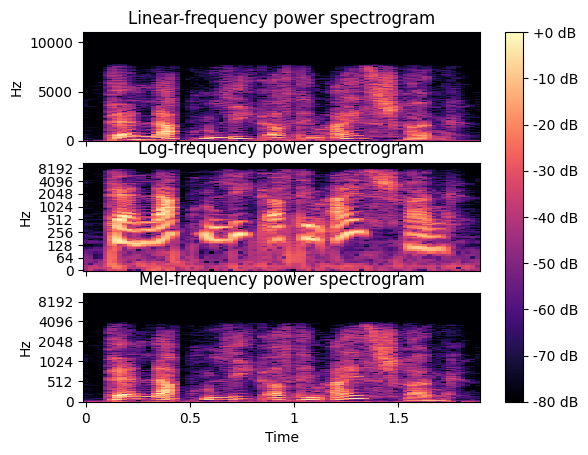

In [20]:
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True)
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio1)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sample_rate1, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

hop_length = 512
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio1, hop_length=hop_length)),
                            ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sample_rate1, hop_length=hop_length,
                         x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()

librosa.display.specshow(D, y_axis='mel', sr=sample_rate1, hop_length=hop_length,
                         x_axis='time', ax=ax[2])
ax[2].set(title='Mel-frequency power spectrogram')
ax[2].label_outer()

fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

# Function for applying to all files

In [155]:
# function for importing all wav files
audio_files = os.listdir(os.path.join(data_path, 'wav/'))

label_list = []
duration_list = []
zcr_list = []
mean_list = []
median_list = []
max_list = []
min_list = []

for audio_file in audio_files:
    audio_path = os.path.join(data_path, 'wav', audio_file)
    
    # load audio data
    y, sr = librosa.load(audio_path)  
    
    
    """
    #### Naming conventions ####

    Every utterance is named according to the same scheme:
    Positions 1-2: number of speaker
    Positions 3-5: code for text
    Position 6: emotion (sorry, letter stands for german emotion word)
    Position 7: if there are more than two versions these are numbered a, b, c ....
    Example: 03a01Fa.wav is the audio file from Speaker 03 speaking text a01 with the emotion "Freude" (Happiness).
    """
    
    # get emotional label (use all versions?)
    label_dict = {'W':'anger', 'L':'boredom', 'E':'disgust', 'A':'fear', 'F':'happiness', 'T':'sadness', 'N':'neutral'}
    label_list.append(label_dict[audio_file[5]])
    
    # get duration 
    duration_list.append(librosa.get_duration(y=y, sr=sr)) # hop length & frame length are already correct (512, 2048)
    
    # zero-crossing rate
    zcr_list.append(librosa.feature.zero_crossing_rate(y=y)[0])
    
    # mean
    mean_list.append(np.mean(np.abs(y)))
    
    # median
    median_list.append(np.median(np.abs(y)))
    
    # max
    max_list.append(np.max(y))
    
    # min
    min_list.append(np.min(y))
    

df = pd.DataFrame({'file':audio_files, 'emotion':label_list, 'duration':duration_list, 'zcr':zcr_list, 'mean':mean_list,
                   'median':median_list, 'max':max_list, 'min':min_list})

In [156]:
df

,file,emotion,duration,zcr,mean,median,max,min
0,03a01Fa.wav,happiness,1.898277,"[0.00341796875, 0.021484375, 0.03955078125, 0....",0.043283,0.017788,0.989185,-0.793622
1,03a01Nc.wav,neutral,1.611293,"[0.005859375, 0.005859375, 0.0126953125, 0.027...",0.066612,0.018966,0.940210,-1.000460
2,03a01Wa.wav,anger,1.877823,"[0.00830078125, 0.02197265625, 0.03076171875, ...",0.067925,0.024976,1.008495,-1.011148
3,03a02Fc.wav,happiness,2.006259,"[0.03515625, 0.05615234375, 0.07861328125, 0.0...",0.069904,0.027631,1.011801,-0.921925
4,03a02Nc.wav,neutral,1.439819,"[0.0068359375, 0.0068359375, 0.0078125, 0.0273...",0.085804,0.028618,0.891944,-0.998372
...,...,...,...,...,...,...,...,...
530,16b10Lb.wav,boredom,3.442721,"[0.0166015625, 0.01904296875, 0.0234375, 0.039...",0.075134,0.040253,0.788838,-0.999903
531,16b10Tb.wav,sadness,3.500635,"[0.0, 0.02001953125, 0.03369140625, 0.04638671...",0.109530,0.040504,0.928428,-0.846430
532,16b10Td.wav,sadness,3.934195,"[0.00830078125, 0.01220703125, 0.01220703125, ...",0.071857,0.027320,1.024189,-0.627526
533,16b10Wa.wav,anger,2.414150,"[0.06982421875, 0.099609375, 0.14892578125, 0....",0.027512,0.011024,1.038615,-0.417251


In [157]:
df['mean'].describe()

count    535.000000
mean       0.076094
std        0.025480
min        0.026387
25%        0.057499
50%        0.071909
75%        0.090182
max        0.178859
Name: mean, dtype: float64

In [158]:
df['median'].describe()

count    535.000000
mean       0.037429
std        0.018537
min        0.008441
25%        0.024141
50%        0.032136
75%        0.047414
max        0.119993
Name: median, dtype: float64

In [154]:
df['max'].describe()

count    535.000000
mean       0.912942
std        0.132703
min        0.502740
25%        0.839754
50%        0.980192
75%        1.005573
max        1.093990
Name: max, dtype: float64

-> values are very different for the files! means it's hard to get a threshold value valid for all files -> therefore idea is to use mean of abs value as threshold

In [23]:
df.groupby('emotion').describe()

duration                                                    \
             count      mean       std       min       25%       50%   
emotion                                                                
anger        127.0  2.640816  0.728804  1.465850  2.090113  2.609887   
boredom       81.0  2.779001  0.804448  1.520091  2.074694  2.690567   
disgust       46.0  3.352856  1.073298  1.523855  2.552868  3.117211   
fear          69.0  2.233399  0.637359  1.225533  1.607982  2.081315   
happiness     71.0  2.543992  0.682695  1.481406  1.963651  2.463583   
neutral       79.0  2.359260  0.659166  1.430839  1.769773  2.235510   
sadness       62.0  4.052917  1.532624  1.735692  3.076361  3.863379   

                               
                75%       max  
emotion                        
anger      3.116961  5.213515  
boredom    3.398776  4.525850  
disgust    3.943798  5.963855  
fear       2.711791  4.101406  
happiness  3.106848  3.930975  
neutral    2.822041  3.899229  
sadness    5.102392  8.978277

In [24]:
duration = librosa.get_duration(y=audio2, sr=sample_rate2)
duration

1.6112925170068026

In [25]:
zcr

array([0.04541016, 0.09960938, 0.15234375, 0.15966797, 0.15332031,
       0.12158203, 0.09228516, 0.078125  , 0.06689453, 0.11376953,
       0.12353516, 0.14941406, 0.15869141, 0.11962891, 0.13037109,
       0.1328125 , 0.125     , 0.09814453, 0.12109375, 0.13720703,
       0.16162109, 0.21289062, 0.17724609, 0.16113281, 0.16992188,
       0.18798828, 0.20507812, 0.20849609, 0.20166016, 0.13769531,
       0.09716797, 0.08105469, 0.09082031, 0.16064453, 0.24609375,
       0.28515625, 0.27441406, 0.2265625 , 0.18847656, 0.17041016,
       0.21777344, 0.29541016, 0.35644531, 0.41748047, 0.36181641,
       0.28857422, 0.21289062, 0.14941406, 0.13916016, 0.11474609,
       0.08496094, 0.07275391, 0.07666016, 0.08691406, 0.10839844,
       0.1171875 , 0.125     , 0.13916016, 0.14794922, 0.17871094,
       0.2578125 , 0.29443359, 0.30664062, 0.31835938, 0.28320312,
       0.28173828, 0.31103516, 0.30322266, 0.25683594, 0.20019531,
       0.15087891, 0.11474609, 0.12792969, 0.16650391, 0.17968

In [26]:
df['zcr_len'] = df['zcr'].str.len() # zcr have different lengths -> obviously because they have different durations

In [27]:
df

,file,emotion,duration,zcr,zcr_len
0,03a01Fa.wav,happiness,1.898277,"[0.00341796875, 0.021484375, 0.03955078125, 0....",82
1,03a01Nc.wav,neutral,1.611293,"[0.005859375, 0.005859375, 0.0126953125, 0.027...",70
2,03a01Wa.wav,anger,1.877823,"[0.00830078125, 0.02197265625, 0.03076171875, ...",81
3,03a02Fc.wav,happiness,2.006259,"[0.03515625, 0.05615234375, 0.07861328125, 0.0...",87
4,03a02Nc.wav,neutral,1.439819,"[0.0068359375, 0.0068359375, 0.0078125, 0.0273...",63
...,...,...,...,...,...
530,16b10Lb.wav,boredom,3.442721,"[0.0166015625, 0.01904296875, 0.0234375, 0.039...",149
531,16b10Tb.wav,sadness,3.500635,"[0.0, 0.02001953125, 0.03369140625, 0.04638671...",151
532,16b10Td.wav,sadness,3.934195,"[0.00830078125, 0.01220703125, 0.01220703125, ...",170
533,16b10Wa.wav,anger,2.414150,"[0.06982421875, 0.099609375, 0.14892578125, 0....",104


# Energy

In [28]:
# overall magnitude of a signal corresponds to its energy.
def RMS_energy(y, hop_length=512, frame_length=2048):
    return librosa.feature.rms(y=y, hop_length=hop_length, frame_length=frame_length)[0]

In [29]:
rms=RMS_energy(audio1)

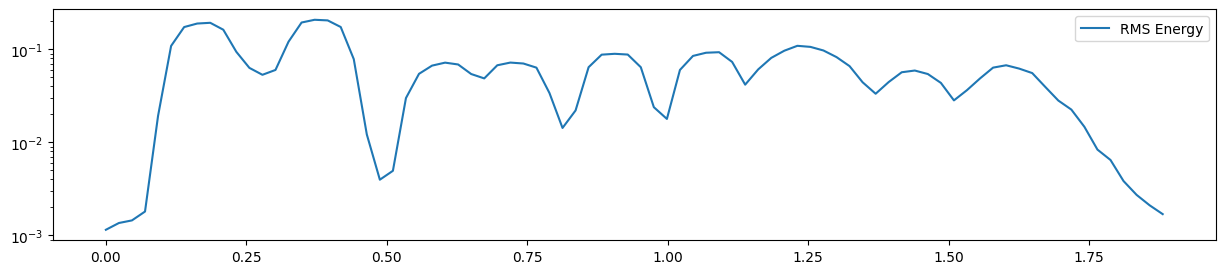

In [30]:
# Plot the RMS energy
plt.figure(figsize=(15, 3))
times = librosa.times_like(rms)
plt.semilogy(times, rms, label='RMS Energy')
plt.legend()
plt.show()

In [33]:
def energy2(x, hop_length=512, frame_length=2048):
    energy_2 = np.array([sum(abs(x[i:i+frame_length]**2)) for i in range(0, len(x), hop_length)])
    return (energy_2 - np.min(energy_2)) / (np.max(energy_2) - np.min(energy_2))

In [37]:
# detailed computation of feature vector length (number of frames on which we compute the features)
# source for understanding: https://superkogito.github.io/blog/2020/01/25/signal_framing.html
def feature_length_computation(y, sf, hop_length=512, frame_length=2048):
    duration = librosa.get_duration(y=y, sr=sr)
    
    # padding
    padding = [(0, 0) for _ in range(y.ndim)]
    padding[-1] = (int(frame_length // 2), int(frame_length // 2)) # (1024, 1024)
    # Pads with the edge values of array with 1024 padded to the edges of each axis
    y = np.pad(y, padding, mode="edge") # -> len(y) from 41857 to 43905 for audio1
    
    overall_samples = len(y) # 43905 for audio1
    overlap = frame_length - hop_length
    frames = int((overall_samples - overlap) / hop_length)
    return frames

In [54]:
feature_length_computation(audio1, sample_rate1)

82

In [55]:
feature_length_computation(audio2, sample_rate2)

70

In [303]:
# function to visualize different features across the wave signal
def feature_visualization(y, sf, features, title=None, base=2, sure_threshold=0.05, hop_length=512, frame_length=2048):
    t = librosa.frames_to_time(range(feature_length_computation(y, sf, hop_length=hop_length, frame_length=frame_length)
                                    ), hop_length=hop_length)
    
    plt.figure(figsize=(10, 5))
    librosa.display.waveshow(y, alpha=0.5)
    if 'spectral_entropy' in features:
        plt.plot(t, spectral_entropy(y, sf), label='spectral_entropy')
    if 'shannon_entropy' in features:
        plt.plot(t, shannon_entropy(y, base=base), label='shannon_entropy')
    if 'rms' in features:
        plt.plot(t, RMS_energy(y), label='rms_energy')
    if 'rms_log' in features:
        plt.plot(t, RMS_log_entropy(y), label='log rms')
    if 'ae' in features:
        plt.plot(t, amplitude_envelope(y), label='amplitude_envelope')
    if 'zcr' in features: 
        print(f"Overall number of zero crossings: {sum(librosa.zero_crossings(y))}")
        plt.plot(t, ZCR(y), color="r", label='zcr')
    if 'energy2' in features: # not necessary -> chose rms for norm energy
        plt.plot(t, energy2(y), label='energy2')
    if 'threshold_entropy' in features:
        plt.plot(t, threshold_entropy(y), label='threshold_entropy')
    if 'log_energy_entropy' in features:
        plt.plot(t, log_energy_entropy(y), label='log_energy_entropy')
    if 'sure_entropy' in features: 
        plt.plot(t, sure_entropy(y, threshold=sure_threshold), label='sure_entropy')
    
    
    plt.ylim((-1, 1))
    plt.xlim((t[0],t[-1]))
    plt.legend()
    plt.title(title)
    plt.show()

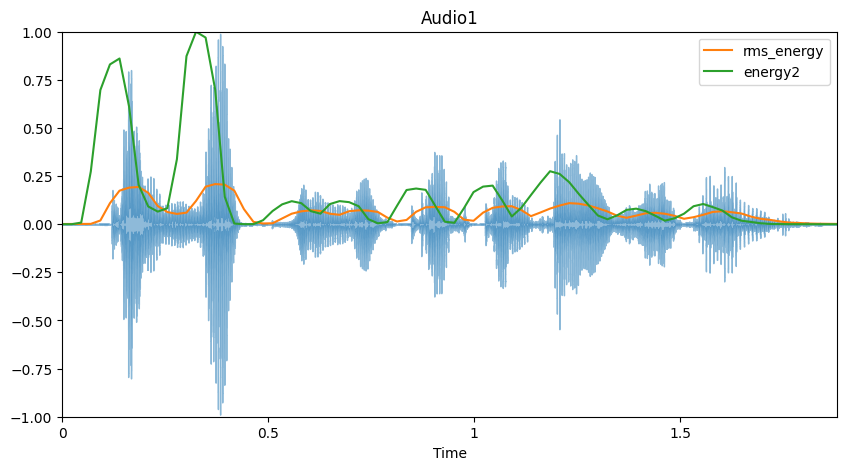

In [77]:
feature_visualization(audio1, sample_rate1, ['energy2', 'rms'], 'Audio1')

very similar! -> can use rms energy where $ RMS = \sqrt{\frac{1}{N} \sum{|x|}^2}$ which is actually like the L2-Norm; energy is usually defined as the total magnitude of the signal which would be $energy = \sum{|x|}^2$

In [39]:
def RMS_log_entropy(y, hop_length=512, frame_length=2048):
    S, phase = librosa.magphase(librosa.stft(y)) # separate spectrogram in magnitude and phase
    return librosa.feature.rms(S=S)[0]

[Text(0.5, 1.0, 'log Power spectrogram')]

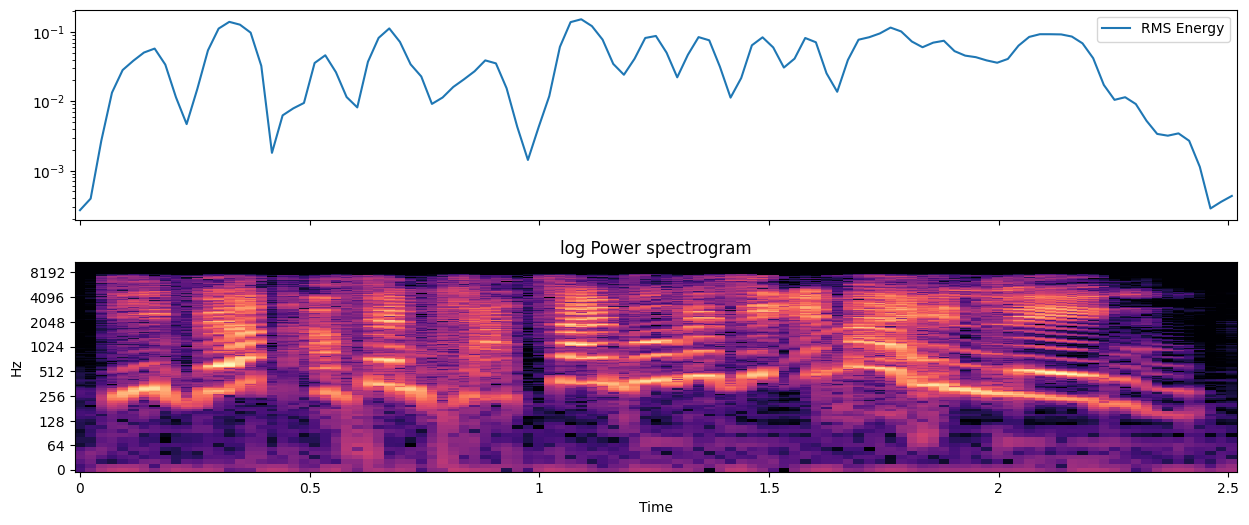

In [40]:
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)[0]

# Plot the RMS energy
fig, ax = plt.subplots(figsize=(15, 6), nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms, label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

In [41]:
def amplitude_envelope(y, frame_length=2048, hop_length=512):
  return np.array([max(y[i:i+frame_length]) for i in range(0, y.size, hop_length)])

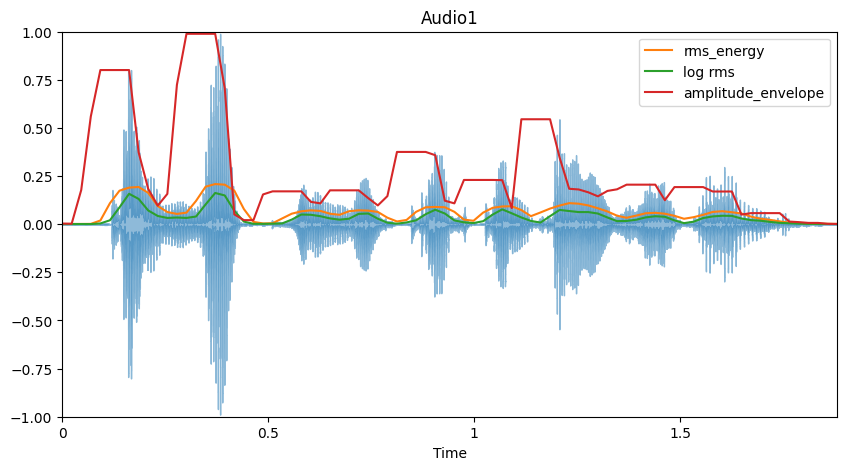

In [42]:
feature_visualization(audio1, sample_rate1, ['rms', 'rms_log', 'ae'], 'Audio1')

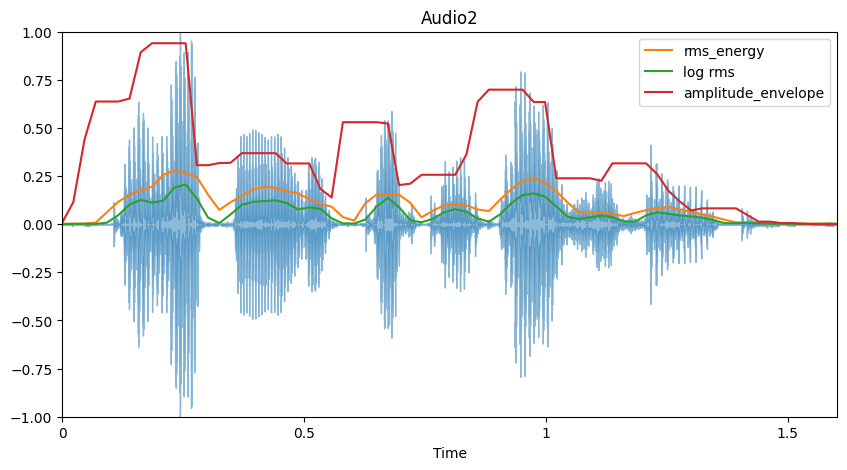

In [43]:
feature_visualization(audio2, sample_rate2, ['rms', 'rms_log', 'ae'], 'Audio2')

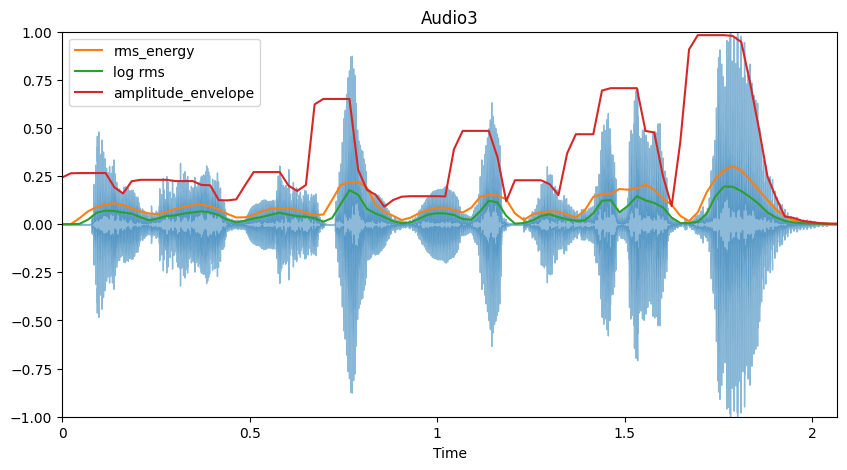

In [44]:
feature_visualization(audio3, sample_rate3, ['rms', 'rms_log', 'ae'], 'Audio3')

In [45]:
# function for zero crossing rate
# rate at which a signal changes from positive to zero to negative or from negative to zero to positive
# how often does signal cross 0/horizontal axis?
def ZCR(y, frame_length=2048, hop_length=512):
    return librosa.feature.zero_crossing_rate(y=y, frame_length=frame_length, hop_length=hop_length)[0]

Overall number of zero crossings: 3987


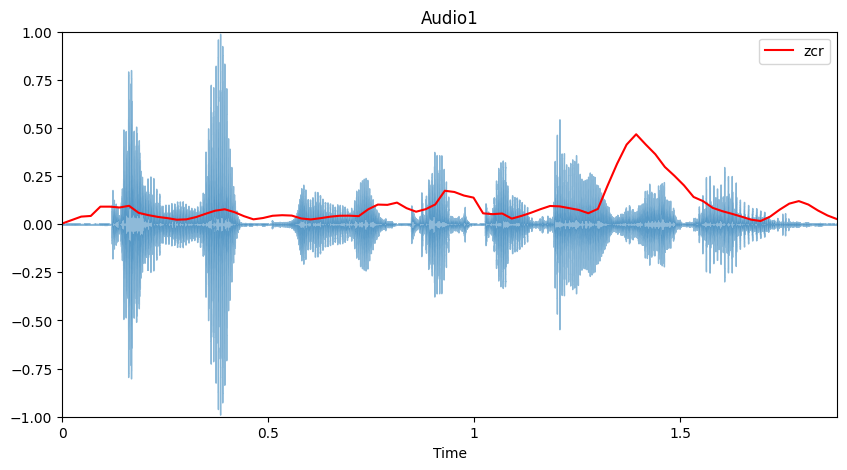

In [46]:
feature_visualization(audio1, sample_rate1, ['zcr'], 'Audio1')

Overall number of zero crossings: 2357


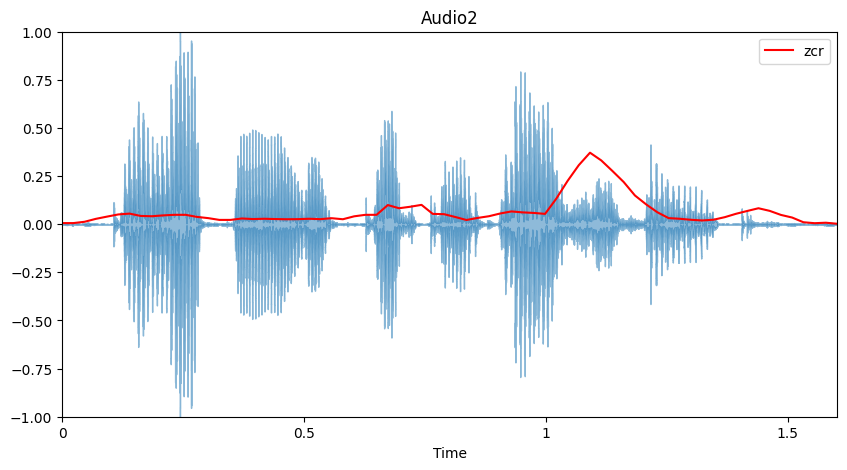

In [47]:
feature_visualization(audio2, sample_rate2, ['zcr'], 'Audio2')

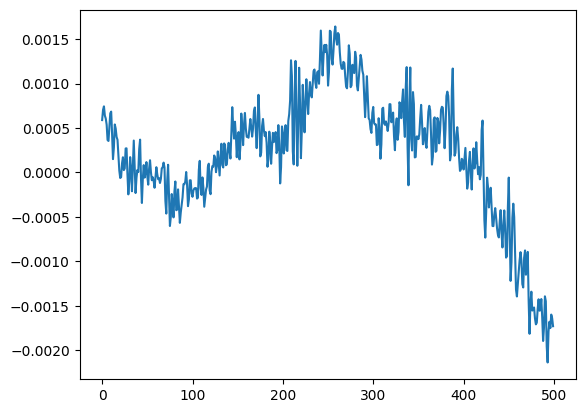

In [48]:
# zoom in
plt.plot(audio1[1500:2000])
plt.show()

In [49]:
zero_crossings = librosa.zero_crossings(audio1[1500:2000], pad=False) # actual number of zero crossing within that chosen frame
print(sum(zero_crossings))

43


# Entropy
## Spectral Entropy

In [50]:
# from source code librosa generate frames
def frames_gen(y, center=True, frame_length=2048, hop_length=512, pad_mode="constant"):
    if y is not None:
        if center:
            padding = [(0, 0) for _ in range(y.ndim)]
            padding[-1] = (int(frame_length // 2), int(frame_length // 2))
            y = np.pad(y, padding, mode=pad_mode)
            
    return librosa.util.frame(y, frame_length=frame_length, hop_length=hop_length) 

In [51]:
# function for computation of spectral entropy
'''
    Spectral Entropy is defined to be the Shannon entropy of the power
    spectral density (PSD) of the data:
    .. math:: H(x, sf) =  -\\sum_{f=0}^{f_s/2} P(f) \\log_2[P(f)]
    Where :math:`P` is the normalised PSD, and :math:`f_s` is the sampling frequency.
'''

def spectral_entropy(y, sf, center=True):
    frames = frames_gen(y, center=center)
    frames = np.transpose(frames)
    spectral = [ant.spectral_entropy(frame, sf=sf, method='welch', normalize=True) for frame in frames]   
    return spectral

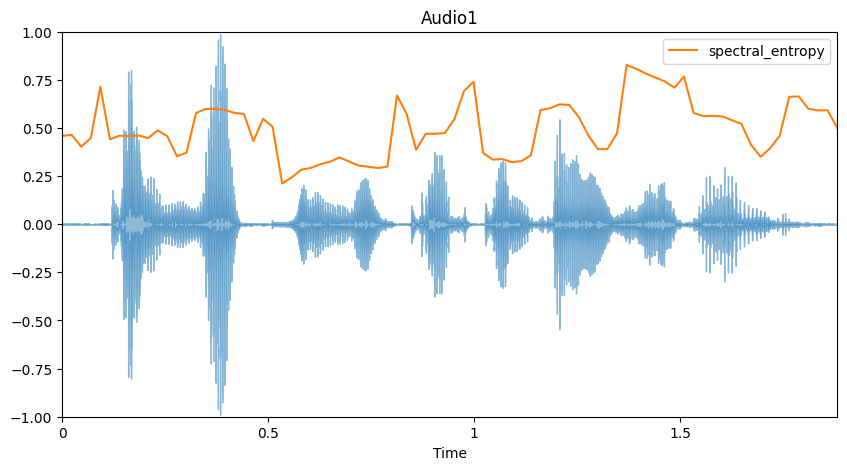

In [52]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy'], 'Audio1')

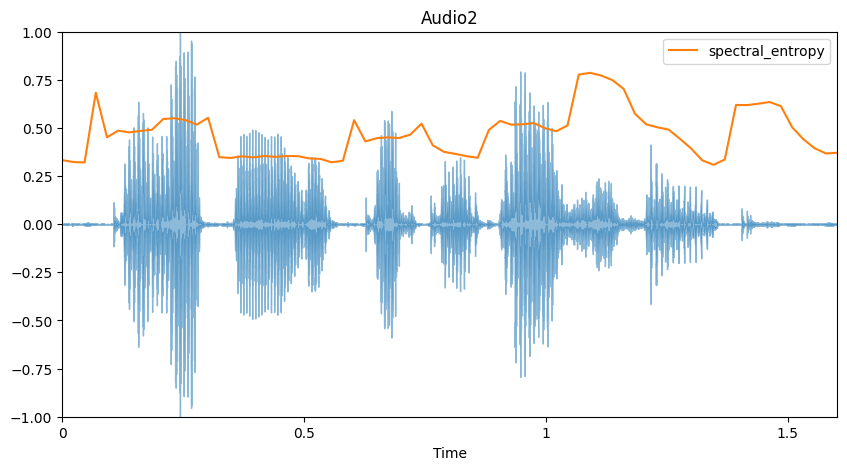

In [53]:
feature_visualization(audio2, sample_rate2, ['spectral_entropy'], 'Audio2')

In [56]:
# understand zero crossing rate (feature computation) form source code
y = audio1
frame_length = 2048
hop_length = 512

padding = [(0, 0) for _ in range(y.ndim)]
padding[-1] = (int(frame_length // 2), int(frame_length // 2))
y = np.pad(y, padding, mode="edge") 

y_framed = librosa.util.frame(y, frame_length=frame_length, hop_length=hop_length)

crossings = librosa.zero_crossings(y_framed, axis=-2, pad=False)

zcrate = np.mean(crossings, axis=-2, keepdims=True)

In [57]:
len(y)

43905

In [58]:
np.unique(np.transpose(crossings)[0], return_counts=True)

(array([False,  True]), array([2041,    7], dtype=int64))

In [59]:
np.transpose(zcrate)[0]

array([0.00341797])

In [60]:
print(np.unique(np.transpose(crossings)[1], return_counts=True))
print(np.transpose(zcrate)[1])

(array([False,  True]), array([2004,   44], dtype=int64))
[0.02148438]


-> zcr is approximately # of True / # of False, i.e. for frame 0: 7/2041 = 0.003

**Auffällig**: rms benutzt pad mode "constant" und zcr pad mode "edge" -> for spectral, pad mode "constant" benutzt

## Log Entropy

In [61]:
from pyAudioAnalysis import ShortTermFeatures

In [62]:
features, feature_names = ShortTermFeatures.feature_extraction(audio1, sample_rate1, window=2048, step=512, deltas=True)

Padding fehlt hier leider! (siehe Länge eines features)

In [63]:
features_df = pd.DataFrame(np.transpose(features), columns = feature_names)

In [64]:
features_df

,zcr,energy,energy_entropy,spectral_centroid,spectral_spread,spectral_entropy,spectral_flux,spectral_rolloff,mfcc_1,mfcc_2,...,delta chroma_4,delta chroma_5,delta chroma_6,delta chroma_7,delta chroma_8,delta chroma_9,delta chroma_10,delta chroma_11,delta chroma_12,delta chroma_std
0,0.021006,0.000002,3.073395,0.192248,0.221622,0.241103,0.000000,0.008789,-37.611744,1.918771,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.028334,0.000003,2.992183,0.189832,0.223267,0.141409,0.008231,0.002930,-38.573920,1.725460,...,-0.153974,-0.001650,-0.014820,-0.000252,-0.002156,0.079960,-0.000283,-0.002208,0.000008,-0.004925
2,0.075721,0.000381,0.975051,0.243679,0.184166,2.151217,0.028114,0.344727,-27.745506,0.988554,...,0.014508,0.003363,0.007951,0.004114,-0.000386,-0.066234,0.005992,0.012889,0.010479,-0.035948
3,0.089399,0.012174,1.150653,0.154482,0.186764,0.551606,0.004220,0.061523,-23.006287,2.564875,...,-0.026804,0.006141,-0.000893,-0.000475,0.015688,-0.012805,0.034637,0.008454,0.008752,-0.005305
4,0.091842,0.030996,2.148035,0.136144,0.156729,0.484994,0.002326,0.058594,-21.967657,2.226707,...,0.002180,-0.007651,-0.004063,0.010979,0.000088,-0.012410,-0.021277,-0.016742,-0.014228,-0.004514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.077675,0.000222,2.633131,0.145443,0.173978,0.678579,0.003038,0.159180,-28.628794,1.958311,...,0.034567,0.012323,0.007425,-0.007042,0.001153,0.004744,0.000646,0.040764,-0.012475,-0.008681
74,0.113825,0.000071,2.773962,0.179420,0.170670,1.387091,0.002513,0.190430,-29.493783,1.002354,...,0.030682,-0.011590,0.002358,-0.003780,0.001072,0.002471,0.001660,-0.012549,-0.012301,-0.002407
75,0.128969,0.000042,2.526331,0.192200,0.139262,1.532822,0.001127,0.211914,-30.637647,0.031348,...,0.016035,0.000334,-0.009177,0.000933,-0.001044,-0.006790,-0.001590,-0.021494,0.001899,0.003958
76,0.106986,0.000015,2.935837,0.202493,0.158357,1.575785,0.002076,0.214844,-33.094454,0.302949,...,0.136041,-0.002637,-0.001485,-0.000639,-0.002036,0.021240,-0.001188,-0.006363,0.000724,0.037617


In [65]:
spectral_ent_norm = (features[5] - np.min(features[5])) / (np.max(features[5]) - np.min(features[5]))
spectral_ent_norm

array([0.08553723, 0.04616323, 0.83993292, 0.20816979, 0.18186132,
       0.16661762, 0.15656101, 0.15597829, 0.11350713, 0.12740908,
       0.00986848, 0.05029067, 0.2702286 , 0.35672528, 0.36582399,
       0.37061079, 0.38487379, 0.41559093, 0.22823446, 0.1252808 ,
       0.13351193, 0.06312397, 0.00556496, 0.        , 0.00742251,
       0.01885313, 0.04159786, 0.08989551, 0.15941427, 0.14604903,
       0.14989094, 0.1593994 , 0.17928772, 0.69382477, 0.43112698,
       0.21448592, 0.28218931, 0.27076563, 0.29115017, 0.37927072,
       0.450246  , 0.720954  , 0.09784797, 0.04606872, 0.04032258,
       0.01930167, 0.02161615, 0.05781479, 0.41367939, 0.41340134,
       0.40988921, 0.39337837, 0.34330973, 0.21107565, 0.17964037,
       0.26185824, 0.49864087, 1.        , 0.84248444, 0.79805986,
       0.75812284, 0.72930034, 0.71212954, 0.88246822, 0.3425571 ,
       0.31010448, 0.2949352 , 0.2849235 , 0.25371795, 0.22080791,
       0.13539727, 0.00384012, 0.11430388, 0.25831736, 0.53814

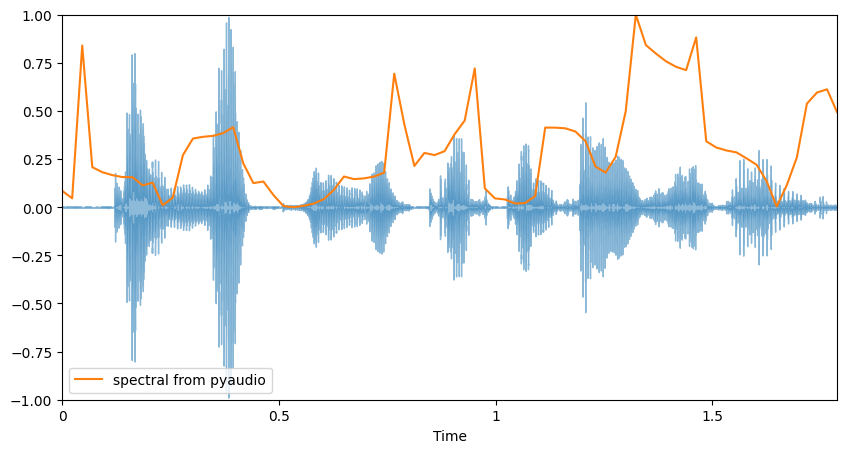

In [66]:
t = librosa.frames_to_time(range(78), hop_length=512)

plt.figure(figsize=(10, 5))
librosa.display.waveshow(audio1, alpha=0.5)
plt.plot(t, spectral_ent_norm, label='spectral from pyaudio')
plt.ylim((-1, 1))
plt.xlim((t[0],t[-1]))
plt.legend()
plt.show()

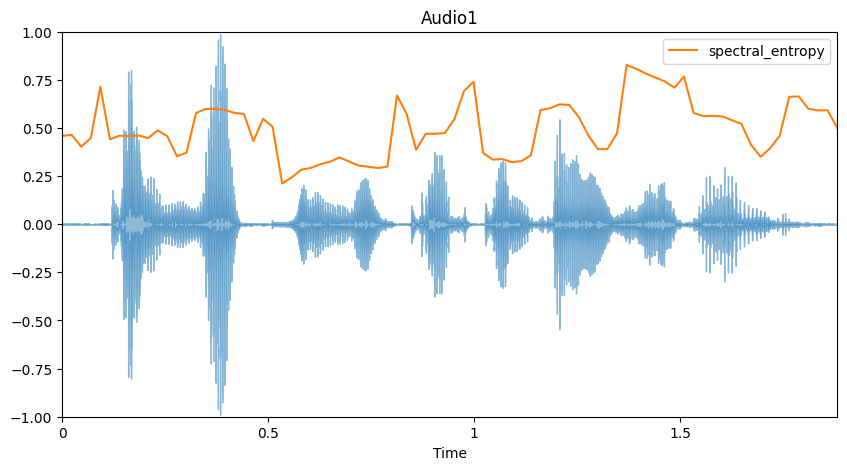

In [67]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy'], 'Audio1')

Have similar shapes but the one from antropy makes more sense compared to other features from librosa. Here we can use padding; in PyAudioaAnalysis no option for padding -> use antropy

In [267]:
def shannon_entropy(y, base=None):
    frames = frames_gen(y)
    frames = np.transpose(frames)
    
    entropy_contour = [entropy(np.histogram(frame, bins=len(frame), density=True)[0], base=base) for frame in frames]
    entropy_contour_norm = (entropy_contour - np.min(entropy_contour)) / (np.max(entropy_contour) - np.min(entropy_contour))
    return entropy_contour_norm

In [264]:
def shannon_entropy2(y, base=None):
    frames = frames_gen(y)
    frames = np.transpose(frames)
    
    entropies = []
    
    for frame in frames: 
        hist, bin_edges = np.histogram(frame, bins=len(frame), density=True)
        probs = hist * np.diff(bin_edges)
        entropies.append(entropy(probs, base=base))
    
    return entropies

not necessary; already works with first version! Have almost completely same numbers/results!

"With an appropriate normalization, the power spectrum of an audio signal can be interpreted as a probability density." - https://www.researchgate.net/publication/231167623_On_the_Generalization_of_Shannon_Entropy_for_Speech_Recognition
-> use power spectrum as probability density of the audio signal!! Histogram is also working! Can compare both!

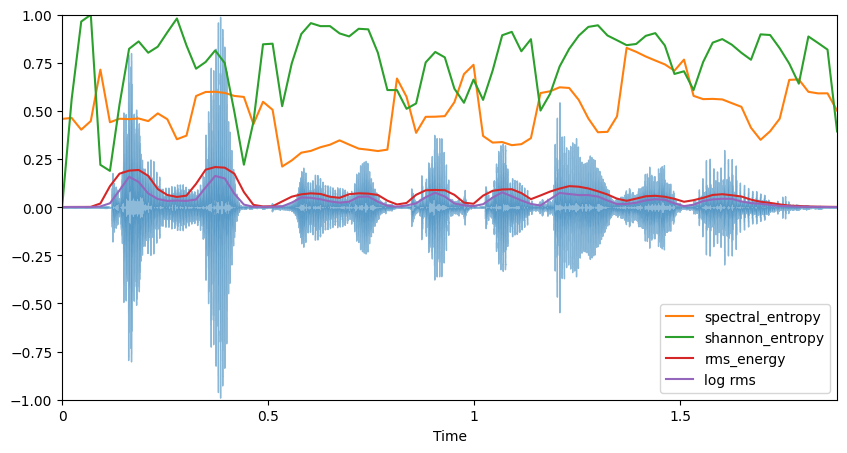

In [69]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy', 'shannon_entropy', 'rms', 'rms_log'])

In [194]:
def threshold_entropy(y):
    thrd = np.mean(np.abs(y)) # threshold is the mean of the absolute signal 

    filtered_signal = np.array([1 if np.abs(val) >= thrd else 0 for val in y])
    frames = frames_gen(filtered_signal)
    frames = np.transpose(frames)
    return [np.mean(frame) for frame in frames]

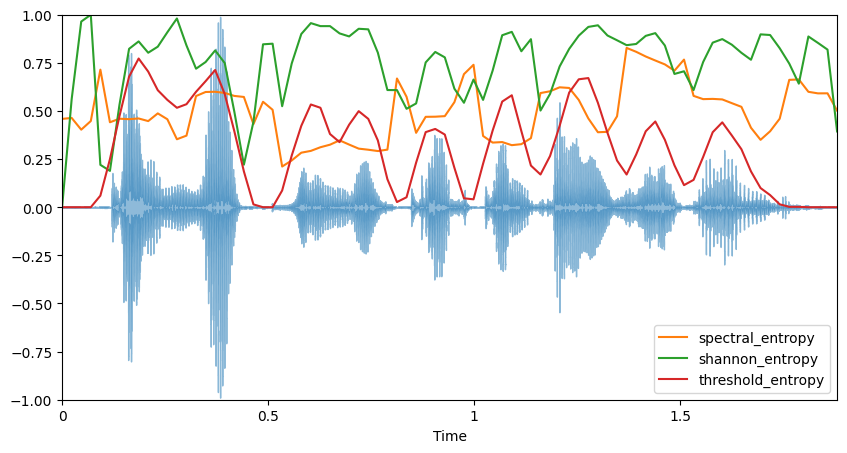

In [167]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy', 'shannon_entropy', 'threshold_entropy'])

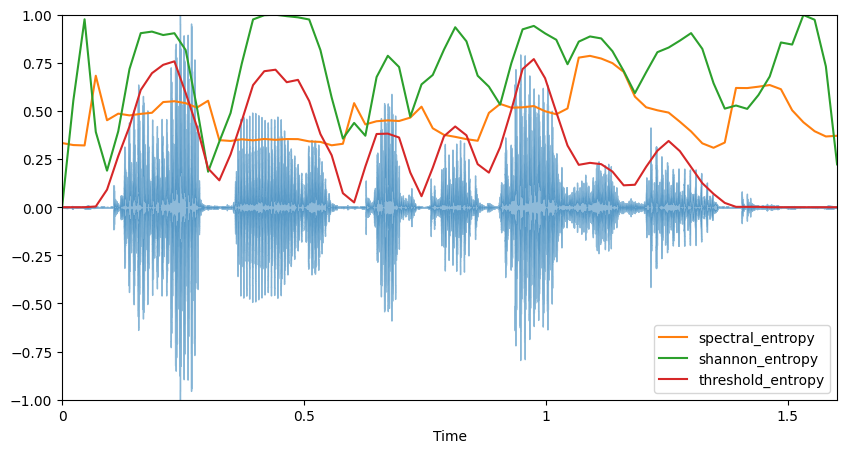

In [168]:
feature_visualization(audio2, sample_rate2, ['spectral_entropy', 'shannon_entropy', 'threshold_entropy'])

In [173]:
def threshold_entropy2(y): # as version 2
    thrd = 0.2 * np.max(np.abs(y))

    filtered_signal = np.array([1 if np.abs(val) >= thrd else 0 for val in y])
    frames = frames_gen(filtered_signal)
    frames = np.transpose(frames)
    return [np.mean(frame) for frame in frames]

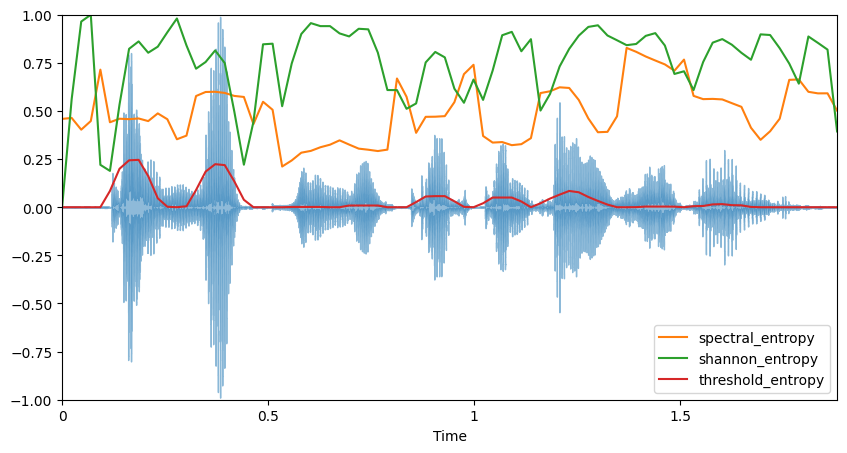

In [174]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy', 'shannon_entropy', 'threshold_entropy'])

In [191]:
def log_energy_entropy(y):
    frames = frames_gen(y)
    frames = np.transpose(frames)
    
    # mask invalid values (inf is masked from log computations)
    log_entropy = np.ma.masked_invalid([np.sum(np.log(np.square(frame))) for frame in frames]) 
    log_entropy_norm = (log_entropy - np.min(log_entropy)) / (np.max(log_entropy) - np.min(log_entropy))
    return np.ma.filled(log_entropy_norm, fill_value=0)

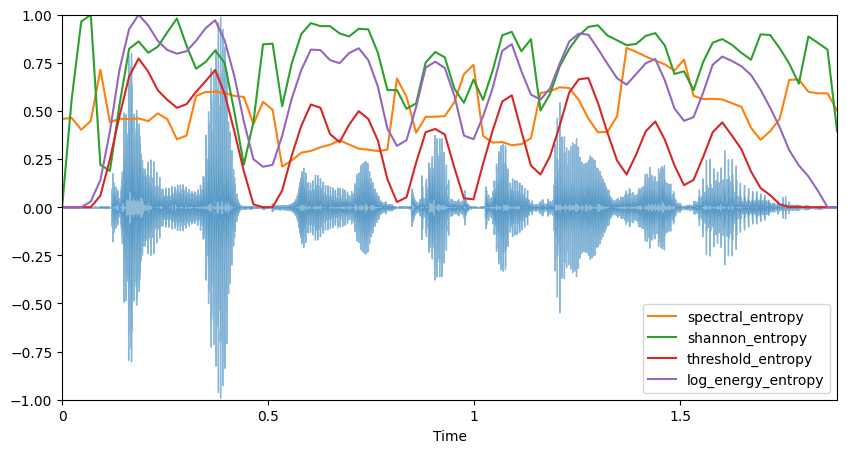

In [195]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy', 'shannon_entropy', 'threshold_entropy', 
                                             'log_energy_entropy'])

In [301]:
def sure_entropy(y, threshold=0.05):
    frames = frames_gen(y)
    frames = np.transpose(frames)
    
    sure_ent = []
    
    for frame in frames: 
        hist, bin_edges = np.histogram(frame, bins=len(frame), density=True)
        probs = hist * np.diff(bin_edges)
        sure_ent.append(np.sum(np.minimum(probs, threshold)))
        
    sure_ent_norm = (sure_ent - np.min(sure_ent)) / (np.max(sure_ent) - np.min(sure_ent))

    return sure_ent_norm

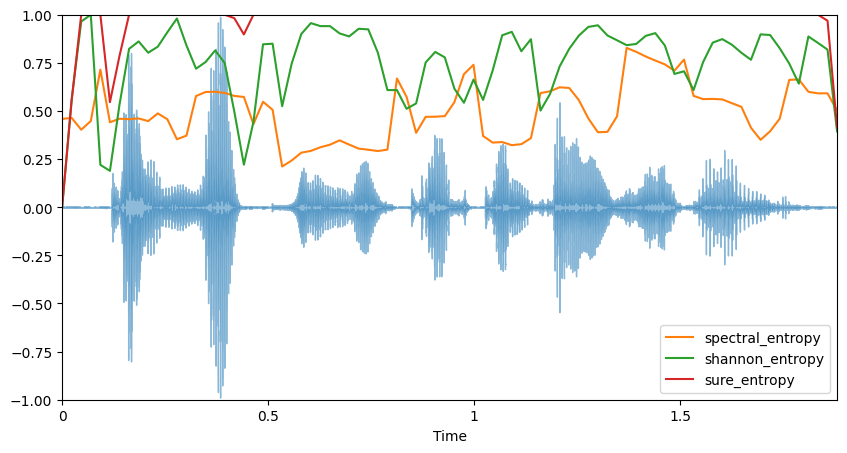

In [302]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy', 'shannon_entropy', 'sure_entropy'])

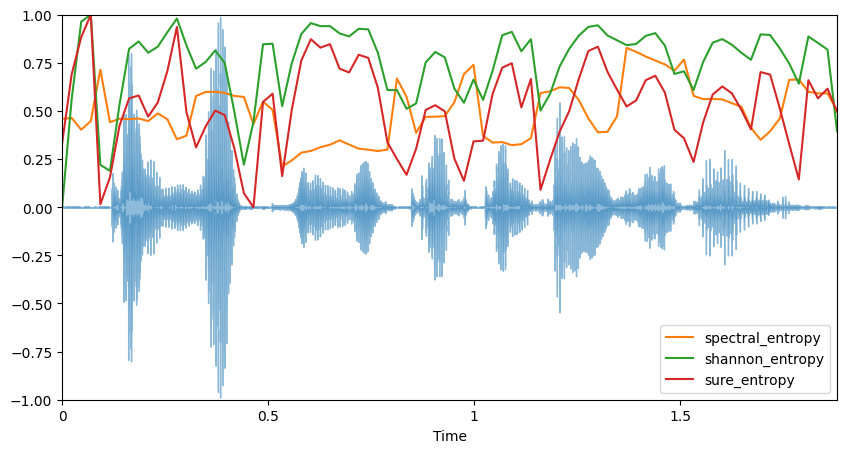

In [307]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy', 'shannon_entropy', 'sure_entropy'], sure_threshold=0.0005)